# Introduction

In this Project, I'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

Project Data:

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the [hand-written digits dataset from UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier


In [2]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

**REMARK** 

Attributes are 8x8 image of integer pixels in the range 0..16.
Number of Attributes:64




In [3]:
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### Transform data to dataframe


In [4]:
data= pd.DataFrame(data= digits.data)
target = pd.Series(digits['target'])
images = digits['images']
target_names = digits['target_names']

In [5]:
target.shape, data.shape,images.shape

((1797,), (1797, 64), (1797, 8, 8))

### Attributes of the imported data:

**We  can visually check that the images and the data are related by reshaping the images array to two dimensions**: digits.images.reshape((1797, 64))

- **data’: the data to learn**
- **‘images’**: the images corresponding to each sample
    - images data contains three dimensions: there are 1797 instances that are 8 by 8 pixels 
- **‘target’: the classification labels for each sample**
    - All target values contain 10 unique values, namely, from 0 to 9. In other words, all 1797 target values are made up of numbers that lie between 0 and 9. 
- **‘target_names’**: the meaning of the labels
- 'DESCR’: the full description of the dataset.

Note: pixel values are integers that range from 0 (black) to 255 (white).

We are interested in attributes data and target.

In [6]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


### Visualizing some of the images

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels). To visualize the image, we need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


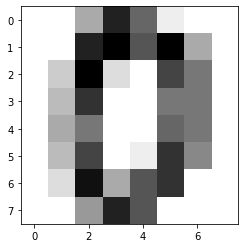

In [7]:
# Visualizing first image

first_image = data.iloc[0]
np_image = first_image.values
print(np_image)
# Reshaping first row from data to original pixel(i.e 8 X 8 matrix)
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')


Let's visualize a scatter plot grid, with 2 rows and 4 columns.
- In the first row:
        Display the images corresponding to rows 0, 100, 200, and 300.
- In the second row:
        Display the images corresponding to rows 1000, 1100, 1200, and 1300.

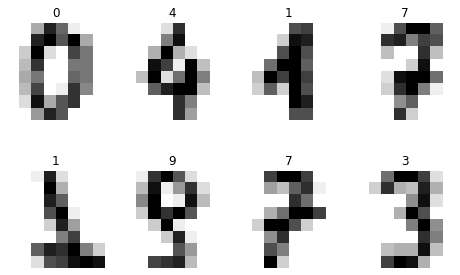

In [8]:
first_row=[0,100,200,300]
second_row=[1000,1100,1200,1300]
fig = plt.figure(figsize=(8,5))
i=0
for val in first_row:
    plt.subplot(2,4,i+1)
    image = data.iloc[val]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    plt.imshow(np_image, cmap='gray_r')
    plt.title(target[val])
    plt.axis('off')
    i +=1
for val in second_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[val], cmap='gray_r')
    plt.title(target[val])
    plt.axis('off')
    i +=1



### Choosing metrics

Generally classifications are measured on indicators such as percentage correct.We can use mean squared error(MSE).But,MSE is more apt for forecasting values of continuous variables. So, we choose percentage correct to find accuracies of our classification models

# K Nearest Neighbor

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. 

In [9]:
def train_knn(k,train_features,train_target):
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(train_features,train_target)
    return model

def test_knn(model,test_features,test_target):
    predictions=model.predict(test_features)
    # Proportion of currectly predicted values 
    overall_accuracy = sum(test_target == predictions)/len(test_target)    
    return overall_accuracy
    
def cross_validation_kfold(k,folds):
    kf=KFold(n_splits=folds,shuffle=True,random_state=1)
    validation_accuracies=[]
    accuracies_train=[]
    for train_index,test_index in kf.split(data):
        train_features=data.loc[train_index]
        test_features=data.loc[test_index]
        train_target=target.loc[train_index]
        test_target=target.loc[test_index]
        model=train_knn(k,train_features,train_target)
        # Validation test
        accuracy_test=test_knn(model,test_features,test_target)
        validation_accuracies.append(accuracy_test)
        # training test
        accuracy_train=test_knn(model,train_features,train_target)
        accuracies_train.append(accuracy_train)
    mean_accuracy_test=np.mean(validation_accuracies)
    mean_accuracy_train=np.mean(accuracies_train)

    return mean_accuracy_test,mean_accuracy_train
    

In [10]:

overall_accuracies_validation=[]
overall_accuracies_train=[]

for k in range(1,10):
    accuracy=cross_validation_kfold(k,4)
    overall_accuracies_validation.append(accuracy[0])
    overall_accuracies_train.append(accuracy[1])


  

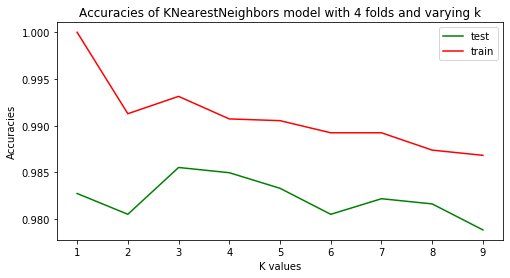

In [11]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),overall_accuracies_validation,label="test",color="green")
plt.plot(range(1,10),overall_accuracies_train,label="train",color="red")
plt.xlabel("K values")
plt.ylabel("Accuracies") 
plt.title("Accuracies of KNearestNeighbors model with 4 folds and varying k")
plt.legend()
plt.show()

In [12]:
overall_accuracies_train,overall_accuracies_validation

([1.0,
  0.9912814552175513,
  0.9931363299914746,
  0.9907246623445001,
  0.9905390647201496,
  0.9892409828192774,
  0.9892407074518823,
  0.9873855573105637,
  0.9868289021212101],
 [0.9827456075228903,
  0.9805184360306854,
  0.9855283345706509,
  0.9849690670626082,
  0.9832999257609502,
  0.9805159613956941,
  0.9821863400148477,
  0.9816295471417965,
  0.9788468200940361])

**We performed hyperparameterization to find most accuracy which is 98.55%. The optimal value is at k=3.** For all other values of k, accuracy score is decreasing. 

There are a few downsides to using k-nearest neighbors:
- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore
 
After train/test model on both train and test dataset, we see same pattern with varying k values. Both, datasets performed well at k=3. However, accuracy for train dataset is 99.3% which is 0.7% more than test dataset.

Let's see if MLPClassifier captures overfitting/underfitting.

# MLPClassifier Model

### Number of hidden layers=1 and 4-Fold validation

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

### Overfitting/Underfitting in a model with only one layer of hidden neurons
We will now attempt to discern at what number of neurons in a model with one hidden layer do we see either and or overfitting and underfitting. To determine this we will plot the accuracies of a model tested on the test_set against the saqme model tested on the training set that was used to fit it. We will illustrate this at each of the above stipulated number of hidden neurons to determine at which point we see the model underfit/overfit.



In [13]:
def kfold_MLP(neuron_arch,folds):
    kf=KFold(n_splits=folds,shuffle=True,random_state=2)
    validation_accuracies=[]
    accuracies_train=[]
    for train_index,test_index in kf.split(data):
        train_features=data.loc[train_index]
        test_features=data.loc[test_index]
        train_target=target.loc[train_index]
        test_target=target.loc[test_index]
        # hidden_layer_sizes: represents the number of neurons in the ith hidden layer.
        mlp = MLPClassifier(hidden_layer_sizes=neuron_arch,random_state=2)
        model=mlp.fit(train_features, train_target)
        predictions = model.predict(test_features)
        # Proportion of currectly predicted values 
        accuracy = sum(test_target == predictions)/len(test_target)   
        validation_accuracies.append(accuracy)
        predictions_train = model.predict(train_features)
        # Proportion of currectly predicted values 
        accuracy_train = sum(train_target == predictions_train)/len(train_target)   
        accuracies_train.append(accuracy_train)
    train_accuracy=np.mean(accuracies_train)
    validation_accuracy=np.mean(validation_accuracies)
    return validation_accuracy, train_accuracy

In [14]:
# function to plot graph with varying Kfolds and hidden layers

def plot_accuracies_k_neurons(neurons,folds,layers):
    test_accuracies=[]
    train_accuracies=[]
    for n in neurons:
        x,y=kfold_MLP(n,folds)
        test_accuracies.append(x)
        train_accuracies.append(y)
        print("Mean test accuracy at {} neurons:".format(n[0]), x)
    plt.figure(figsize=(8,4))
    plt.title("Mean Accuracy vs. Neurons In {} Hidden Layer, with {} folds".format(layers,folds))
    x_values = [i[0] for i in neurons]
    plt.plot(x_values, test_accuracies,label="test",color="green")
    plt.plot(x_values, train_accuracies,label="train",color="red")
    plt.legend()
    plt.show()
    return test_accuracies,train_accuracies

C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

Mean test accuracy at 8 neurons: 0.9298799802029201


C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

Mean test accuracy at 16 neurons: 0.9554875030932937
Mean test accuracy at 32 neurons: 0.9682863152684978
Mean test accuracy at 64 neurons: 0.9721826280623608
Mean test accuracy at 128 neurons: 0.9755209106656768
Mean test accuracy at 256 neurons: 0.9783036377134373


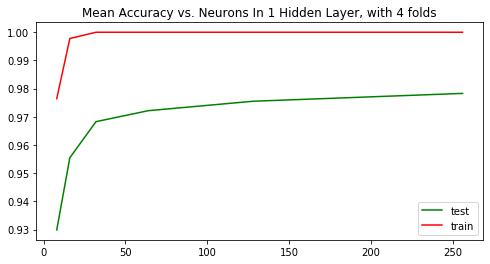

In [15]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies_test = []
nn_one_accuracies_train= []

nn_one_accuracies_test,nn_one_accuracies_train=plot_accuracies_k_neurons(nn_one_neurons,4,1)



In [16]:
nn_one_accuracies_test

[0.9298799802029201,
 0.9554875030932937,
 0.9682863152684978,
 0.9721826280623608,
 0.9755209106656768,
 0.9783036377134373]

In [17]:
nn_one_accuracies_train

[0.9764439715468378, 0.9977740676610735, 1.0, 1.0, 1.0, 1.0]

***REMARK***
It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97.8%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

At 256 neuron in single hidden layer achieved accuracy of 97.8%

Given that k-nearest neighbors achieved approximately 98.55% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### Number of hidden layers=2 and 4-Fold validation

C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

Mean test accuracy at 8 neurons: 0.9170824053452116
Mean test accuracy at 32 neurons: 0.9638381588715664
Mean test accuracy at 64 neurons: 0.9694023756495918
Mean test accuracy at 128 neurons: 0.9799715416975996
Mean test accuracy at 256 neurons: 0.9827567433803515


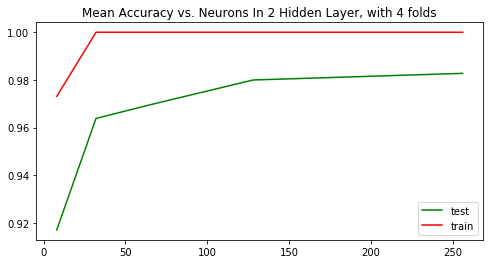

In [18]:
nn_two_neurons=[(8,8),(32,32),(64,64),(128,128),(256,256)]

nn_two_accuracies_test,nn_two_accuracies_train=plot_accuracies_k_neurons(nn_two_neurons,4,2)

In [19]:
nn_two_accuracies_test

[0.9170824053452116,
 0.9638381588715664,
 0.9694023756495918,
 0.9799715416975996,
 0.9827567433803515]

In [20]:
nn_two_accuracies_train

[0.9731037650433207, 1.0, 1.0, 1.0, 1.0]

***REMARK***

At 256 neurons with 2 hidden layer achieved accuracy of 98.27%, which 0.25% less accurate than K nearest neighbors model.

Adding second hidden layer did show slight improvement over the previous model.

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

### Number of hidden layers=3 and 6-Fold validation

C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

Mean test accuracy at 8 neurons: 0.938792270531401


C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anam-Zoheb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

Mean test accuracy at 16 neurons: 0.9521516164994427
Mean test accuracy at 32 neurons: 0.9716313638052769
Mean test accuracy at 64 neurons: 0.9716276477146043
Mean test accuracy at 128 neurons: 0.9766387959866222
Mean test accuracy at 256 neurons: 0.9771980676328503


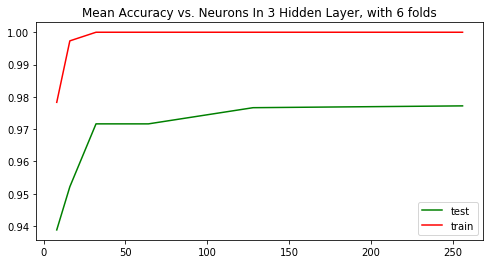

In [21]:
nn_three_neurons=[(8,8,8),(32,32,32),(64,64,64),(128,128,128),(256,256,256)]
nn_three_accuracies_test,nn_three_accuracies_train = plot_accuracies_k_neurons(nn_one_neurons,6,3)



In [22]:
nn_three_accuracies_test

[0.938792270531401,
 0.9521516164994427,
 0.9716313638052769,
 0.9716276477146043,
 0.9766387959866222,
 0.9771980676328503]

In [23]:
nn_three_accuracies_train

[0.9782974939643417, 0.9973291784577908, 1.0, 1.0, 1.0, 1.0]

***REMARK***

At 256 neurons with 3 hidden layer and 6 folds we achieved accuracy of 97.72%.This is less accurate than K nearest neighbors model and MLPClassifier with 2 hidden layers at 256 neurons.

Adding third hidden layer didnot show improvement over the previous models.

We have a scope to optimize parameters like learning rate and momentum instead of the hidden layers.

# Decision Tree and Random Forrests
We will now attempt to use both a decision tree model and then a Randeom Forrest model to determine if we can get improved accuracy. Once we have done this we can compare the performance of each model in the project.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def decision_tree_kfold(folds,depth):
    kf=KFold(n_splits=folds,shuffle=True,random_state=2)
    validation_accuracies=[]
    accuracies_train=[]
    for train_index,test_index in kf.split(data):
        train_features=data.loc[train_index]
        test_features=data.loc[test_index]
        train_target=target.loc[train_index]
        test_target=target.loc[test_index]
        dt=DecisionTreeClassifier(max_depth=depth,random_state=2)
        model=dt.fit(train_features, train_target)
        predictions = model.predict(test_features)
        # Proportion of currectly predicted values 
        accuracy = sum(test_target == predictions)/len(test_target)   
        validation_accuracies.append(accuracy)
        predictions_train = model.predict(train_features)
        # Proportion of currectly predicted values 
        accuracy_train = sum(train_target == predictions_train)/len(train_target)   
        accuracies_train.append(accuracy_train)
    train_accuracy=np.mean(accuracies_train)
    validation_accuracy=np.mean(validation_accuracies)
    return validation_accuracy, train_accuracy


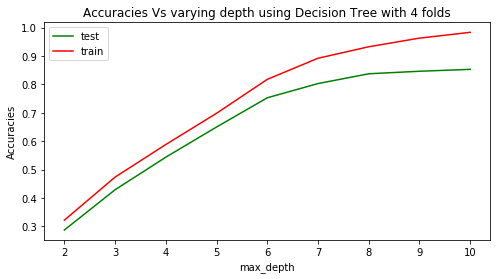

In [25]:
validation_accuracies=[]
train_accuracies=[]
for depth in range(2,11):
    x,y=decision_tree_kfold(4,depth)
    validation_accuracies.append(x)
    train_accuracies.append(y)
    
plt.figure(figsize=(8,4))
plt.title("Accuracies Vs varying depth using Decision Tree with 4 folds")
plt.ylabel("Accuracies")
plt.xlabel("max_depth")
plt.plot(range(2,11),validation_accuracies,label="test",color="green")
plt.plot(range(2,11),train_accuracies,label="train",color="red")
plt.legend()

    

In [26]:
validation_accuracies

[0.287147983172482,
 0.42904355357584756,
 0.5436760702796337,
 0.6499727790150953,
 0.7529274931947538,
 0.803012868101955,
 0.8375142291512002,
 0.8464179658500373,
 0.8530970056916605]

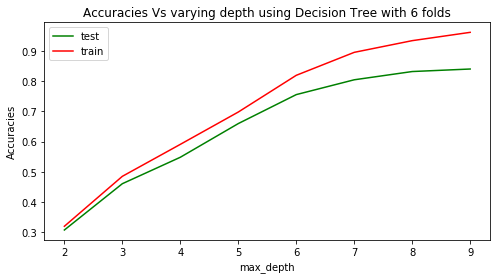

In [27]:
validation_accuracies_k6=[]
train_accuracies_k6=[]
for depth in range(2,10):
    x,y=decision_tree_kfold(6,depth)
    validation_accuracies_k6.append(x)
    train_accuracies_k6.append(y)
    
plt.figure(figsize=(8,4))
plt.title("Accuracies Vs varying depth using Decision Tree with 6 folds")
plt.ylabel("Accuracies")
plt.xlabel("max_depth")
plt.plot(range(2,10),validation_accuracies_k6,label="test",color="green")
plt.plot(range(2,10),train_accuracies_k6,label="train",color="red")
plt.legend()


In [28]:
validation_accuracies_k6

[0.3077331846897064,
 0.4607673727238945,
 0.5481363805276849,
 0.6594425863991081,
 0.7551709401709403,
 0.8041397250092902,
 0.8313935340022297,
 0.8397342995169083]

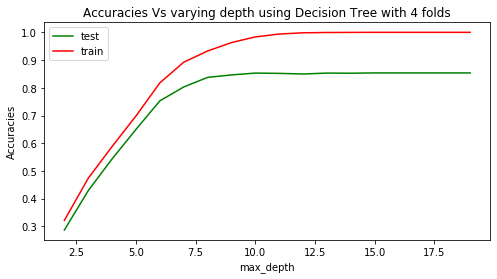

In [29]:
validation_accuracies=[]
train_accuracies=[]
for depth in range(2,20):
    x,y=decision_tree_kfold(4,depth)
    validation_accuracies.append(x)
    train_accuracies.append(y)
    
plt.figure(figsize=(8,4))
plt.title("Accuracies Vs varying depth using Decision Tree with 4 folds")
plt.ylabel("Accuracies")
plt.xlabel("max_depth")
plt.plot(range(2,20),validation_accuracies,label="test",color="green")
plt.plot(range(2,20),train_accuracies,label="train",color="red")
plt.legend()

In [30]:
validation_accuracies

[0.287147983172482,
 0.42904355357584756,
 0.5436760702796337,
 0.6499727790150953,
 0.7529274931947538,
 0.803012868101955,
 0.8375142291512002,
 0.8464179658500373,
 0.8530970056916605,
 0.851987131898045,
 0.8497587230883445,
 0.8530982430091562,
 0.8525414501361049,
 0.8536550358822074,
 0.8536550358822074,
 0.8536550358822074,
 0.8536550358822074,
 0.8536550358822074]

***REMARK***

Decision Tree model showed highest accuracy of 85.309% at max_depth of 10 with 4 fold cross validation. The accuracy tend to plateau at 10 and above max_depth. Model didn't show improvement when folds were increased. 


# Random Forest Model

In [31]:
def train(train_features, train_target, n):
    dt = RandomForestClassifier(n_estimators = n, bootstrap = True, random_state =1)
    dt.fit(train_features, train_target)
    return dt

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['actual'] = test_target
    train_test_df['predicted'] = predictions
    test_accuracy = sum(train_test_df['predicted'] == train_test_df['actual'])/len(train_test_df)
    return test_accuracy

def cross_validate(n):
    accuracies = {}
    validation_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits = 4, shuffle = True, random_state = 1)
    for test_index, train_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        test_labels, train_labels = target.loc[test_index], target.loc[train_index]
        model = train(train_features, train_labels, n)        
        test_accuracy = test(model, test_features, test_labels)
        train_accuracy = test(model, train_features, train_labels)
        validation_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
    accuracies[train] = train_accuracies
    accuracies[test] = validation_accuracies
    return accuracies


{50: 0.9404534529969886, 100: 0.947132076115954, 150: 0.9469470292263938, 200: 0.9499148013279317}

The optimal value for n_estimators of this random forest tree model is 200 which achieves an accuracy score of 0.9499148013279317


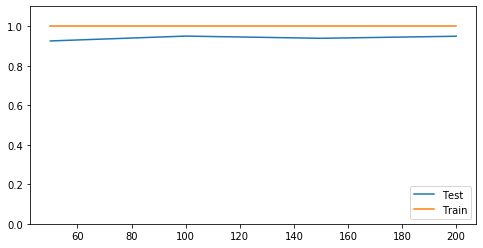

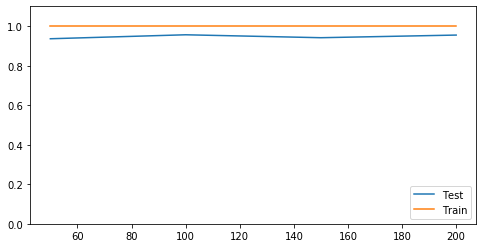

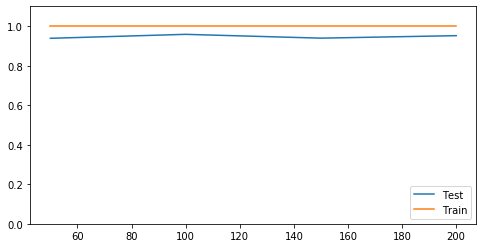

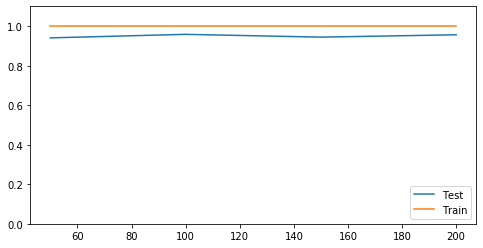

In [32]:


n_estimators_ = [50,100,150,200]
accuracy_by_estimator_count = {}


for n in n_estimators_:
    plt.figure(figsize = (8,4))
    accuracies = cross_validate(n)
    mean_accuracy = np.mean(accuracies[test])
    accuracy_by_estimator_count[n] = mean_accuracy
    plt.plot(n_estimators_, accuracies[test], label = 'Test')
    plt.plot(n_estimators_, accuracies[train], label = 'Train')
    plt.legend(loc = 'lower right')
    plt.ylim(0,1.1)
    
print(accuracy_by_estimator_count)
print()
print('The optimal value for n_estimators of this random forest tree model is', max(accuracy_by_estimator_count, key = accuracy_by_estimator_count.get),
     'which achieves an accuracy score of', max(accuracy_by_estimator_count.values()))

# Conclusion

The results would suggest that, the most accurate model would be the K-nearest neighbors model with a prediction accuracy of about 98.55% at k=3. 

The neural networks models we created, showed accuracies lower than K Nearest Neighbors.The best performing neural network model was with two hidden layer, 256 neurons and 4 folds, achieving an accuracy of 98.27%. 
From this point onwards, adding more folds and layers didnot imporve the accuracy but dimished the accuracy of the model.


On training Decision Tree models, the model showed highest accuracy of 85.309% at max_depth of 10 with 4 fold cross validation. The accuracy tend to plateau at 10 and above max_depth. Looking at the diagrams it seems that this model overfitted (as one would expect with Decision Tree Models), with an practically 100% accuracy on the training data but very poor accuracy on the test data.

Conversely, when runninng the Random Forest model, we found that it was optimized at a value of 200 for the n_estimators parameter achieving an impressive mean prediction accuracy of just under 95%. 


Though Random Forest model accuracy is less than our other best performing models, the graphs suggests that so far it is the best model with less overfitting model over others. This model tend to perform well with new data compared to other models.